In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [56]:
data = pd.read_csv('Week7_test.csv')  # Replace with your dataset's file name


In [57]:
print(data.shape)


(28000, 784)


In [58]:
sampled_data = data.sample(frac=0.1, random_state=42)


In [59]:
print(sampled_data.shape)


(2800, 784)


In [60]:
print(sampled_data.head(5))


       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
18406       0       0       0       0       0       0       0       0       0   
5034        0       0       0       0       0       0       0       0       0   
18325       0       0       0       0       0       0       0       0       0   
22980       0       0       0       0       0       0       0       0       0   
26031       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
18406       0  ...         0         0         0         0         0   
5034        0  ...         0         0         0         0         0   
18325       0  ...         0         0         0         0         0   
22980       0  ...         0         0         0         0         0   
26031       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
18406         0       

In [61]:
print(sampled_data['pixel0'].nunique())  # Replace 'class_label' with the actual column name


1


In [62]:
print(sampled_data['pixel0'].value_counts())  # Replace 'class_label' accordingly


pixel0
0    2800
Name: count, dtype: int64


In [63]:
X = sampled_data.drop('pixel0', axis=1)  # Replace 'class_label' with the target column
y = sampled_data['pixel1']


In [1]:
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')  # Adjust shape if needed
    plt.title(f"Class: {y.iloc[i]}")
    plt.show()


NameError: name 'plt' is not defined

(2800, 783)
(2800, 784)


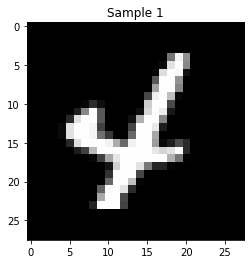

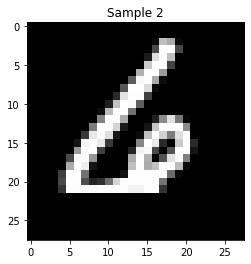

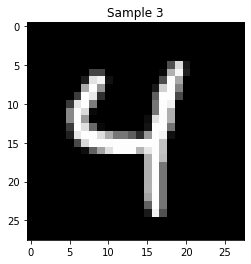

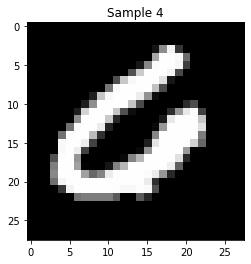

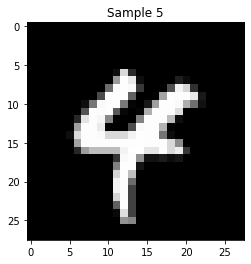

In [65]:
print(X.shape)
import pandas as pd
import numpy as np

# Add a missing column with zeros
X['missing_pixel'] = 0
print(X.shape)  # Should now be (2800, 784)
import matplotlib.pyplot as plt

# Visualize the first 5 samples
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i+1}")
    plt.show()




(2800, 784)
(784,)


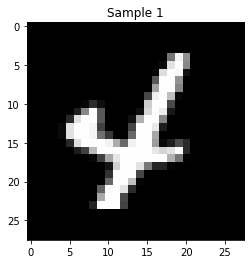

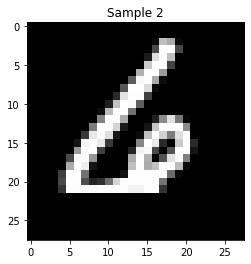

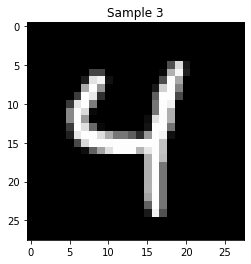

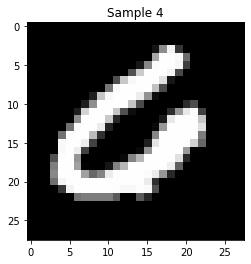

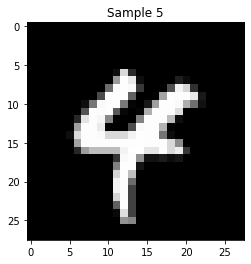

In [66]:
print(X.shape)
print(X.iloc[0].values.shape)  # Check shape of a single row
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i+1}")
    plt.show()



In [67]:
print("Shape of data after processing:", X.shape)


Shape of data after processing: (2800, 784)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [69]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [70]:
y_pred = knn.predict(X_test)


In [71]:
y_pred = knn.predict(X_test)


In [72]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[700]]


/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Example dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

# Get predictions
y_pred = knn.predict(X_test)

# True labels
y_true = y_test  # Ensure this is correctly assigned


In [74]:
all_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [75]:
cm = confusion_matrix(y_true, y_pred, labels=all_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[700   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [76]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



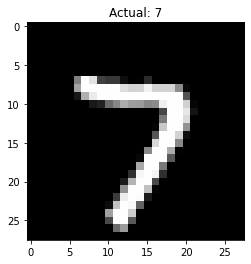

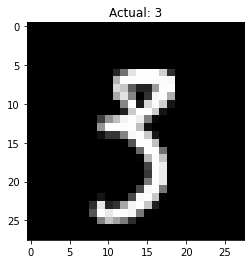

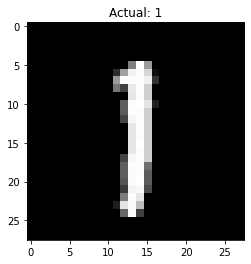

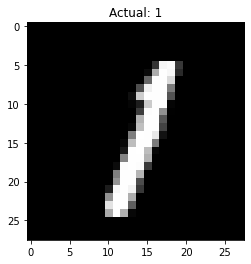

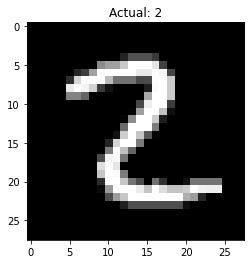

In [87]:
for i in range(5):
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # Adjust shape if needed
    plt.title(f"Actual: {y_pred[i]}")
    plt.show()


In [78]:
print("Unique labels in y_train:", np.unique(y_train))


Unique labels in y_train: [0]


In [79]:
print(y_train.value_counts())  # For Pandas Series


pixel1
0    2100
Name: count, dtype: int64


In [80]:
# Load the dataset again or combine with missing classes
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Unique labels in y_train:", np.unique(y_train))


Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]


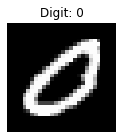

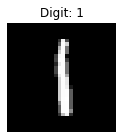

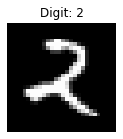

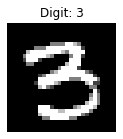

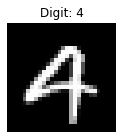

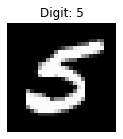

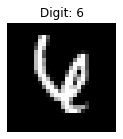

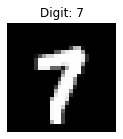

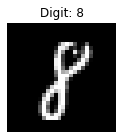

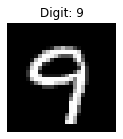

In [81]:
import matplotlib.pyplot as plt

for label in range(10):
    plt.figure(figsize=(2, 2))
    sample = X_train[y_train == label].iloc[0].values.reshape(28, 28)  # Adjust for data shape
    plt.imshow(sample, cmap='gray')
    plt.title(f"Digit: {label}")
    plt.axis('off')
    plt.show()


In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [83]:
# Check unique labels in the test set
print("Unique labels in y_test:", np.unique(y_test))
print("Class distribution in y_test:\n", pd.Series(y_test).value_counts())


Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]
Class distribution in y_test:
 class
1    1575
7    1459
3    1428
2    1398
9    1391
0    1381
6    1375
8    1365
4    1365
5    1263
Name: count, dtype: int64


In [86]:
# Predict using the trained model
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Visualize predictions for the first 10 test samples
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # Adjust shape if needed
    plt.title(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()


In [ ]:
for i in range(5):
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # Adjust shape if needed
    plt.title(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    plt.show()
